In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

import missingno as msno
from textwrap import wrap

In [2]:
data_df = pd.read_csv('Cohort.csv')

In [3]:
data_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0


<AxesSubplot:>

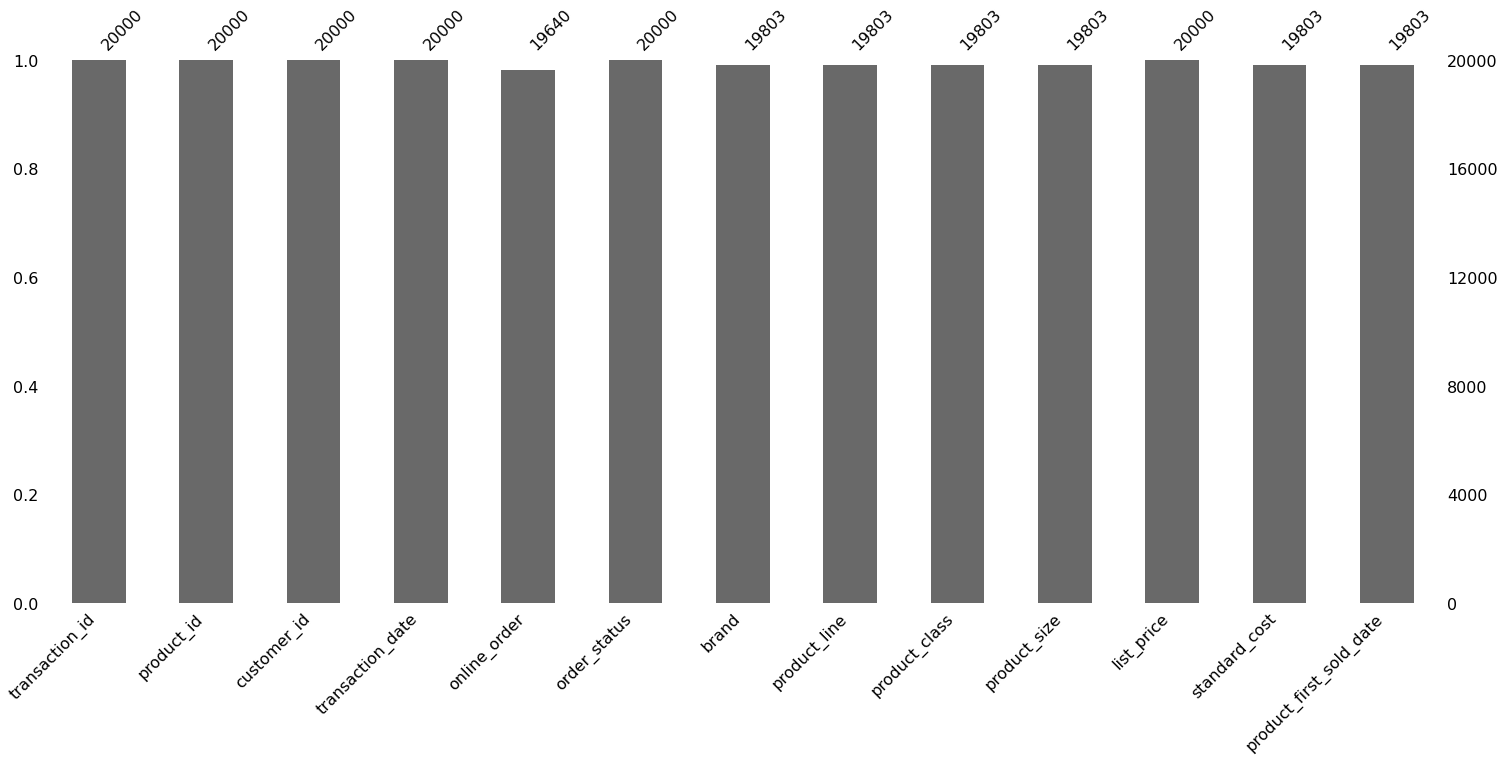

In [4]:
msno.bar(data_df)

In [10]:
# Inspect missing values in the dataset
print(data_df.isnull().values.sum())

# Replace the ' 's with NaN
data_df = data_df.replace(" ", np.NaN)

# Impute the missing values with mean imputation
data_df = data_df.fillna(data_df.mean())

# Count the number of NaNs in the dataset to verify
print(data_df.isnull().values.sum())

985
985


In [15]:
print(data_df.info())

for col in data_df.columns:
    if data_df[col].dtypes == 'object':
        data_df[col] = data_df[col].fillna(data_df[col].value_counts().index[0])

print(data_df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             20000 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  20000 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB
None
0


<AxesSubplot:>

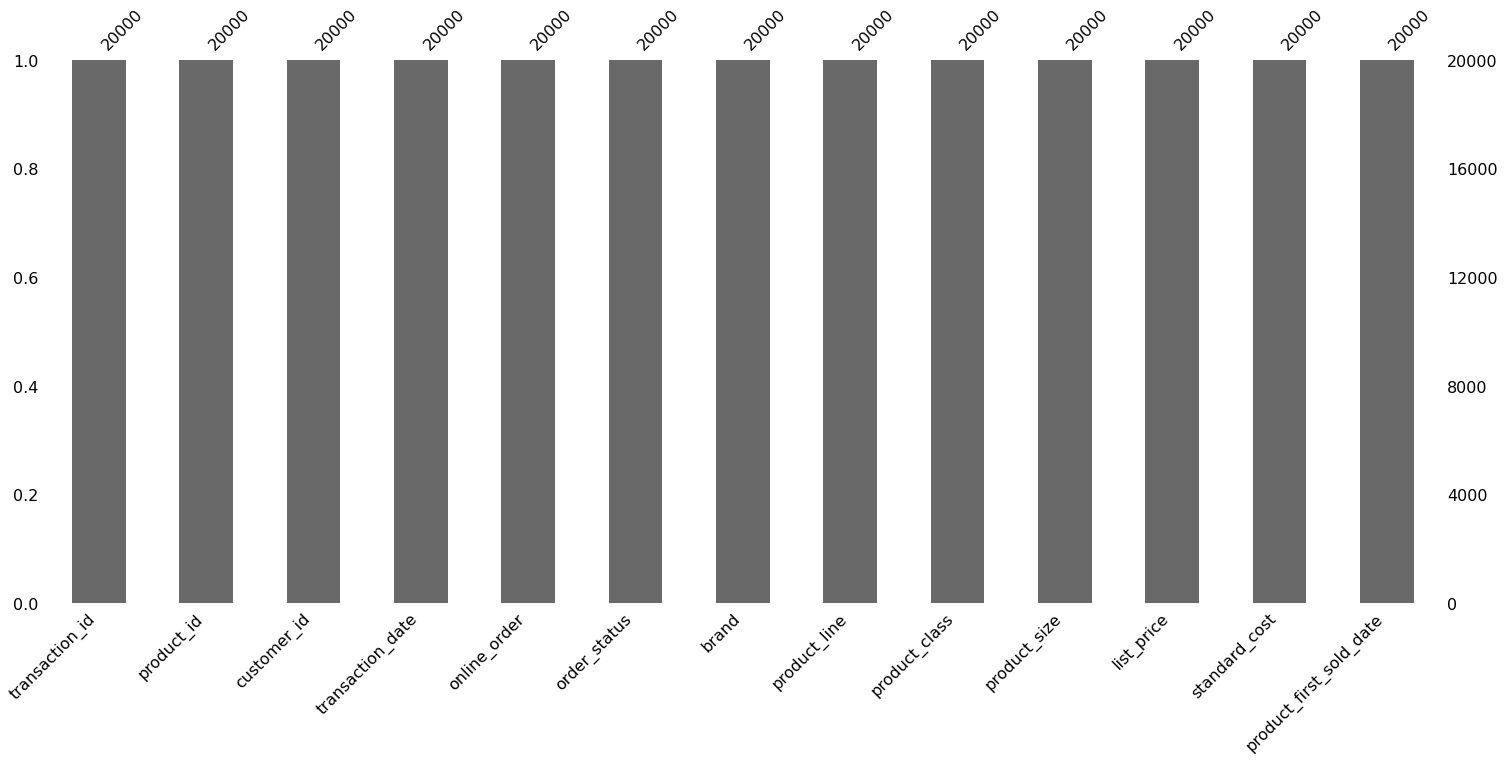

In [16]:
msno.bar(data_df)

In [17]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             20000 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    20000 non-null  object 
 7   product_line             20000 non-null  object 
 8   product_class            20000 non-null  object 
 9   product_size             20000 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            20000 non-null  object 
 12  product_first_sold_date  20000 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


In [18]:
data_df['transaction_date'] = pd.to_datetime(data_df['transaction_date'])

In [19]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  object        
 12  product_first_sold_date  20000 n

In [22]:
def get_month(x): return dt.datetime(x.year, x.month, 1)

# Create transaction_date column based on month and store transaction month
data_df['TransactionMonth'] = data_df['transaction_date'].apply(get_month)

# Grouping by customer_id and select the InvoiceMonth value
grouping = data_df.groupby('customer_id')['TransactionMonth']

# Assigning a minimum InvoiceMonth value to th dataset
data_df['CohortMonth'] = grouping.transform('min')

data_df.shape

(20000, 15)

In [23]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    
    return year, month, day

data_year, data_month, _ = get_date_int(data_df, 'TransactionMonth')

# getting the integers for date parts from the `CohortDay` column

cohort_year, cohort_month, _ = get_date_int(data_df, 'CohortMonth')

In [29]:
years_diff = data_year - cohort_year

months_diff = data_month - cohort_month

data_df['CohortIndex'] = years_diff*12 + months_diff + 1

data_df.head(20)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0,2017-08-01,2017-02-01,7
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0,2017-01-01,2017-01-01,1
5,6,25,2339,2017-08-03,True,Approved,Giant Bicycles,Road,medium,medium,1538.99,$829.65,39031.0,2017-08-01,2017-04-01,5
6,7,22,1542,2017-04-21,True,Approved,WeareA2B,Standard,medium,medium,60.34,$45.26,34165.0,2017-04-01,2017-02-01,3
7,8,15,2459,2017-07-15,False,Approved,WeareA2B,Standard,medium,medium,1292.84,$13.44,39915.0,2017-07-01,2017-05-01,3
8,9,67,1305,2017-10-08,False,Approved,Solex,Standard,medium,large,1071.23,$380.74,33455.0,2017-10-01,2017-02-01,9
9,10,12,3262,2017-08-30,True,Approved,WeareA2B,Standard,medium,medium,1231.15,$161.60,38216.0,2017-08-01,2017-01-01,8


In [30]:
grouping = data_df.groupby(['CohortMonth', 'CohortIndex'])

# Counting number of unique customer Id's falling in each group
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

# Assigning Column names to the dataframe created above
cohort_counts = cohort_data.pivot(index = 'CohortMonth', columns = 'CohortIndex', values = 'customer_id')

cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1358
1,2017-01-01,2,497
2,2017-01-01,3,490
3,2017-01-01,4,490
4,2017-01-01,5,498


In [31]:
cohort_counts.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1358.0,497.0,490.0,490.0,498.0,492.0,534.0,519.0,488.0,527.0,514.0,505.0
2017-02-01,800.0,325.0,305.0,323.0,299.0,297.0,326.0,308.0,328.0,309.0,282.0,NaN
2017-03-01,502.0,189.0,183.0,193.0,189.0,217.0,196.0,188.0,197.0,209.0,NaN,NaN
2017-04-01,305.0,103.0,111.0,129.0,119.0,99.0,130.0,129.0,130.0,NaN,NaN,NaN
2017-05-01,211.0,81.0,87.0,84.0,78.0,89.0,66.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,114.0,37.0,46.0,49.0,38.0,46.0,43.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,80.0,42.0,23.0,30.0,35.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,54.0,18.0,19.0,22.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,34.0,12.0,9.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
cohort_sizes = cohort_counts.iloc[:, 0]

retention = cohort_counts.divide(cohort_sizes, axis=0)

In [33]:
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,36.6,36.1,36.1,36.7,36.2,39.3,38.2,35.9,38.8,37.8,37.2
2017-02-01,100.0,40.6,38.1,40.4,37.4,37.1,40.8,38.5,41.0,38.6,35.2,NaN
2017-03-01,100.0,37.6,36.5,38.4,37.6,43.2,39.0,37.5,39.2,41.6,NaN,NaN
2017-04-01,100.0,33.8,36.4,42.3,39.0,32.5,42.6,42.3,42.6,NaN,NaN,NaN
2017-05-01,100.0,38.4,41.2,39.8,37.0,42.2,31.3,38.4,NaN,NaN,NaN,NaN
2017-06-01,100.0,32.5,40.4,43.0,33.3,40.4,37.7,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,52.5,28.8,37.5,43.8,32.5,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,33.3,35.2,40.7,25.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,35.3,26.5,47.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
retention.index = retention.index.strftime('%Y-%m')
retention.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='CohortMonth')

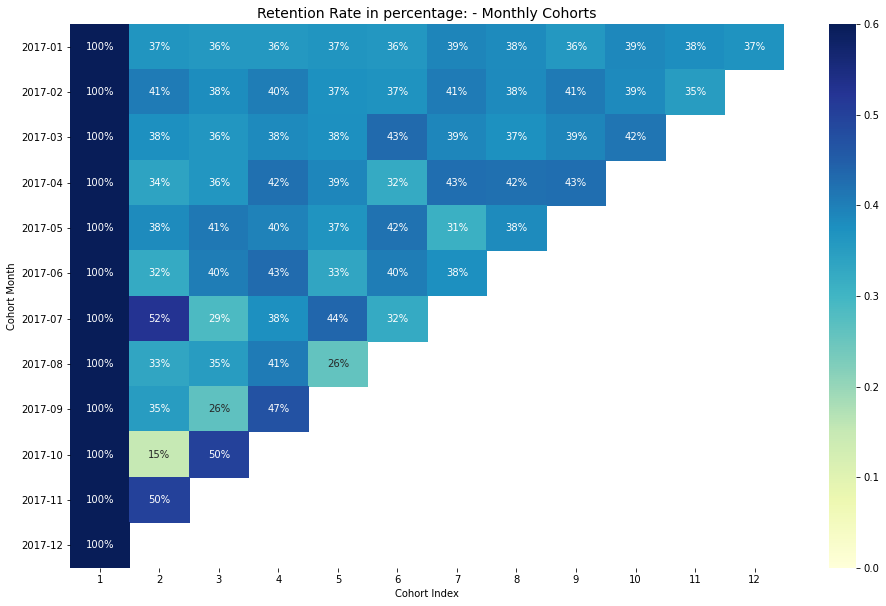

In [35]:
plt.figure(figsize=(16, 10))

plt.title('Retention Rate in percentage: - Monthly Cohorts', fontsize=14)

sns.heatmap(retention, annot = True, fmt = '.0%', cmap = 'YlGnBu', vmin = 0.0, vmax = 0.6)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks(rotation = '360')
plt.show()